In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import dask
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import pandas as pd
import datetime

In [2]:
terr = xr.open_dataset('topo.nc')
topoZ = terr['topo']
topoLon = terr['X']
topoLat = terr['Y']
terr

<xarray.Dataset>
Dimensions:  (X: 3600, Y: 3600)
Coordinates:
  * X        (X) float32 -79.995834 -79.9875 -79.979164 ... -50.0125 -50.004166
  * Y        (Y) float32 -44.995834 -44.9875 -44.979168 ... -15.0125 -15.004167
Data variables:
    topo     (Y, X) float32 ...

In [3]:
stats = xr.open_dataset('stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc')
stats

<xarray.Dataset>
Dimensions:                  (times: 60, tracks: 6865)
Coordinates:
  * tracks                   (tracks) int32 0 1 2 3 4 ... 6861 6862 6863 6864
  * times                    (times) int32 0 1 2 3 4 5 6 ... 54 55 56 57 58 59
Data variables:
    lifetime                 (tracks) float64 ...
    basetime                 (tracks, times) datetime64[ns] ...
    core_meanlat             (tracks, times) float32 ...
    core_meanlon             (tracks, times) float32 ...
    core_mean_y              (tracks, times) float32 ...
    core_mean_x              (tracks, times) float32 ...
    cell_meanlat             (tracks, times) float32 ...
    cell_meanlon             (tracks, times) float32 ...
    cell_mean_y              (tracks, times) float32 ...
    cell_mean_x              (tracks, times) float32 ...
    cell_minlat              (tracks, times) float32 ...
    cell_minlon              (tracks, times) float32 ...
    cell_maxlat              (tracks, times) float32 ...
    cell_maxlon              (tracks, times) float32 ...
    cell_min_y               (tracks, times) float32 ...
    cell_min_x               (tracks, times) float32 ...
    cell_max_y               (tracks, times) float32 ...
    cell_max_x               (tracks, times) float32 ...
    dilatecell_meanlat       (tracks, times) float32 ...
    dilatecell_meanlon       (tracks, times) float32 ...
    dilatecell_mean_y        (tracks, times) float32 ...
    dilatecell_mean_x        (tracks, times) float32 ...
    core_radius              (tracks, times) float32 ...
    cell_radius              (tracks, times) float32 ...
    core_area                (tracks, times) float32 ...
    cell_area                (tracks, times) float32 ...
    maxdbz                   (tracks, times) float32 ...
    maxETH_10dbz             (tracks, times) float32 ...
    maxETH_20dbz             (tracks, times) float32 ...
    maxETH_30dbz             (tracks, times) float32 ...
    maxETH_40dbz             (tracks, times) float32 ...
    maxETH_50dbz             (tracks, times) float32 ...
    cloudnumber              (tracks, times) float64 ...
    status                   (tracks, times) float64 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] ...
    end_basetime             (tracks) datetime64[ns] ...
    start_split_tracknumber  (tracks) float64 ...
    start_split_timeindex    (tracks) float64 ...
    start_split_cloudnumber  (tracks) float64 ...
    end_merge_tracknumber    (tracks) float64 ...
    end_merge_timeindex      (tracks) float64 ...
    end_merge_cloudnumber    (tracks) float64 ...
    merge_tracknumbers       (tracks, times) float64 ...
    split_tracknumbers       (tracks, times) float64 ...
    trackinterruptions       (tracks) float64 ...
    maxrange_flag            (tracks, times) float64 ...
Attributes:
    title:                 File containing statistics for each track
    Institution:           Pacific Northwest National Laboratoy
    Contact:               Zhe Feng, zhe.feng@pnnl.gov
    Created_on:            Wed Jul  1 05:25:28 2020
    source:                CSAPR2
    description:           COR
    startdate:             20181015.0000
    enddate:               20190303.0000
    track_version:         v1.0
    tracknumbers_version:  v1.0
    timegap_hour:          0.5
    time_resolution_hour:  0.25
    pixel_radius_km:       0.5

In [4]:
tracks = stats['tracks']
times = stats['times']

lifetime = stats['lifetime']*0.25
start_time = stats['start_basetime']
end_time = stats['end_basetime']
end_merge_tracknumber = stats['end_merge_tracknumber']
start_split_tracknumber = stats['start_split_tracknumber']
cell_lon = stats['cell_meanlon']
cell_lat = stats['cell_meanlat']
cell_area = stats['cell_area']

eth10 = stats['maxETH_10dbz']
eth20 = stats['maxETH_20dbz']
eth30 = stats['maxETH_30dbz']
eth40 = stats['maxETH_40dbz']
eth50 = stats['maxETH_50dbz']

In [5]:
#remove nans
ind = np.where(np.nan_to_num(cell_lon[:,0]) < 0)[0]

In [6]:
# myvar = np.zeros(10)
# myvar = myvar[:,np.newaxis]
# print(myvar.shape)
# print(np.squeeze(myvar).shape)

In [7]:
lifetime = lifetime[ind]
start_time = start_time[ind]
end_time = end_time[ind]
end_merge_tracknumber = end_merge_tracknumber[ind]
start_split_tracknumber = start_split_tracknumber[ind]
cell_lon = cell_lon[ind,:]
cell_lat = cell_lat[ind,:]
cell_area = cell_area[ind,:]
eth10 = eth10[ind,:]
eth20 = eth20[ind,:]
eth30 = eth30[ind,:]
eth40 = eth40[ind,:]
eth50 = eth50[ind,:]

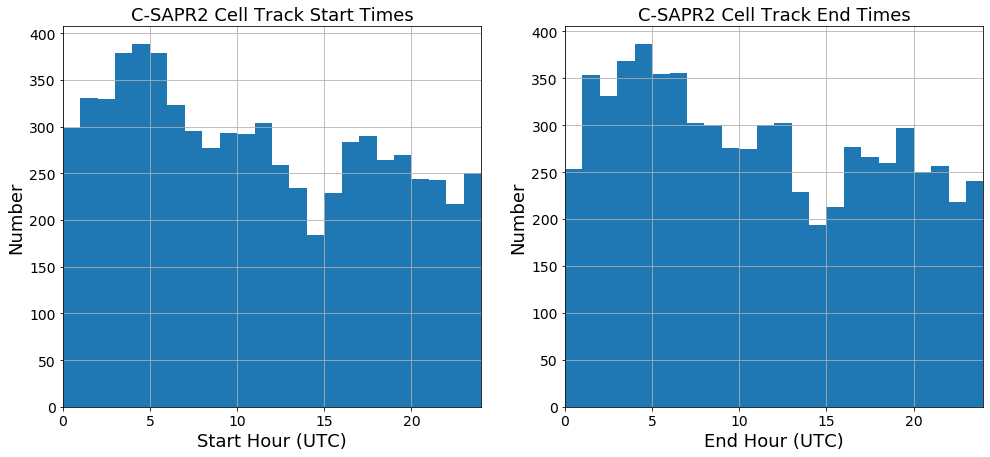

In [8]:
#histograms
plt.rcParams.update({'font.size': 14})

start_hour = start_time.dt.hour
end_hour = end_time.dt.hour

fig = plt.figure(figsize=(16.5,7.))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Start Hour (UTC)', fontsize=18)
ax1.set_ylabel('Number', fontsize=18)
ax1.hist(start_hour, bins=np.arange(25), density=False)
ax1.set_xlim(0, 24)
ax1.set_title('C-SAPR2 Cell Track Start Times', fontsize=18)
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('End Hour (UTC)', fontsize=18)
ax2.set_ylabel('Number', fontsize=18)
ax2.hist(end_hour, bins=np.arange(25), density=False)
ax2.set_xlim(0, 24)
ax2.set_title('C-SAPR2 Cell Track End Times', fontsize=18)
ax2.grid()
fig.savefig('celltrack_startend_times.png')

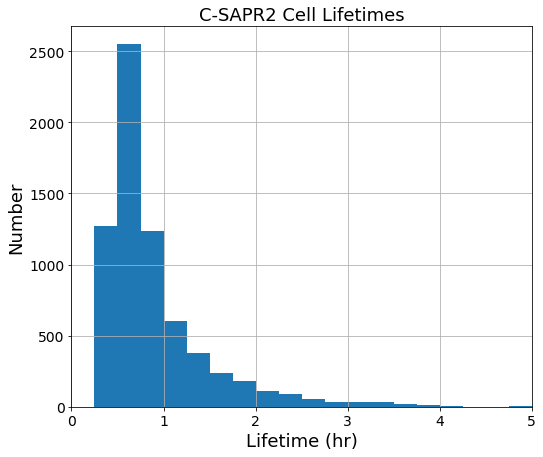

In [9]:
fig = plt.figure(figsize=(8.25,7.))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Lifetime (hr)', fontsize=18)
ax1.set_ylabel('Number', fontsize=18)
ax1.hist(lifetime, bins=np.arange(21)*0.25, density=False)
ax1.set_xlim(0, 5)
ax1.set_title('C-SAPR2 Cell Lifetimes', fontsize=18)
ax1.grid()

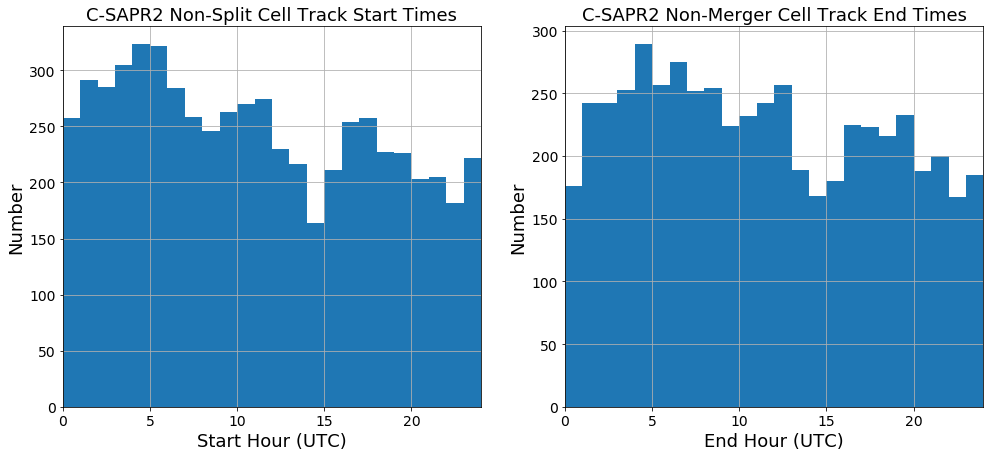

In [10]:
nonmerge = np.where(np.nan_to_num(end_merge_tracknumber) == 0)[0]
nonsplit = np.where(np.nan_to_num(start_split_tracknumber) == 0)[0]

fig = plt.figure(figsize=(16.5,7.))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Start Hour (UTC)', fontsize=18)
ax1.set_ylabel('Number', fontsize=18)
ax1.hist(start_hour[nonsplit], bins=np.arange(25), density=False)
ax1.set_xlim(0, 24)
ax1.set_title('C-SAPR2 Non-Split Cell Track Start Times', fontsize=18)
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('End Hour (UTC)', fontsize=18)
ax2.set_ylabel('Number', fontsize=18)
ax2.hist(end_hour[nonmerge], bins=np.arange(25), density=False)
ax2.set_xlim(0, 24)
ax2.set_title('C-SAPR2 Non-Merger Cell Track End Times', fontsize=18)
ax2.grid()

In [12]:
start_lon=np.empty(6857)
start_lat=np.empty(6857)
end_lon=np.empty(6857)
end_lat=np.empty(6857)

max_area=np.empty(6857)
max_eth10=np.empty(6857)
max_eth20=np.empty(6857)
max_eth30=np.empty(6857)
max_eth40=np.empty(6857)
max_eth50=np.empty(6857)

for i in np.arange(6857):
    tmp1 = cell_lon[i,:]   
    ind1 = np.where(tmp1 < -60)
    tmp2 = cell_lat[i,:]
    ind2 = np.where(tmp2 < -30)

    start_lon[i] = tmp1[0]
    start_lat[i] = tmp2[0]
    end_lon[i] = tmp1[np.max(ind1)]
    end_lat[i] = tmp2[np.max(ind2)]
    max_area[i] = np.nanmax(cell_area[i,:])
    max_eth10[i] = np.nanmax(eth10[i,:])
    max_eth20[i] = np.nanmax(eth20[i,:])
    max_eth30[i] = np.nanmax(eth30[i,:])
    max_eth40[i] = np.nanmax(eth40[i,:])
    max_eth50[i] = np.nanmax(eth50[i,:])

/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: All-NaN axis encountered
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN axis encountered
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: All-NaN axis encountered
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: All-NaN axis encountered


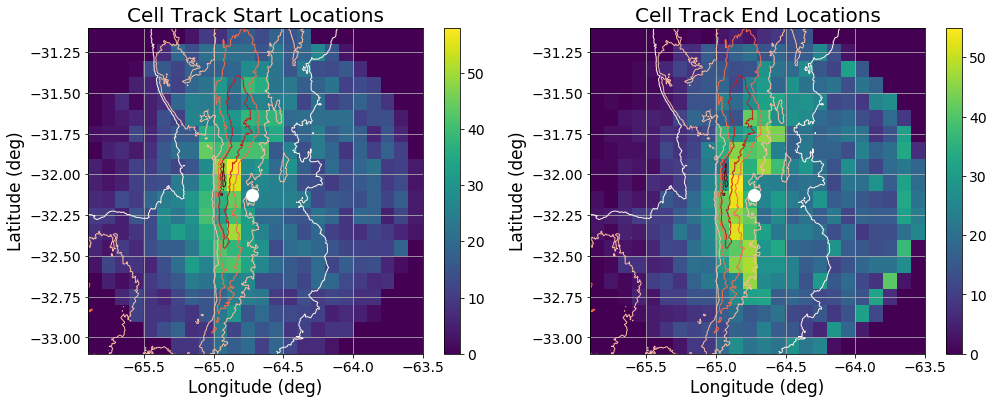

In [13]:
#lon-lat density (joint histogram)
fig = plt.figure(figsize=(16.5,6.))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Longitude (deg)', fontsize=17)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h = ax1.hist2d(start_lon, start_lat, bins=[24,20], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax1)
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.set_title('Cell Track Start Locations', fontsize=20)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Longitude (deg)', fontsize=17)
ax2.set_ylabel('Latitude (deg)', fontsize=17)
h = ax2.hist2d(end_lon, end_lat, bins=[24,20], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax2)
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.set_title('Cell Track End Locations', fontsize=20)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
fig.savefig('celltrack_startend_loc_0.1.png')

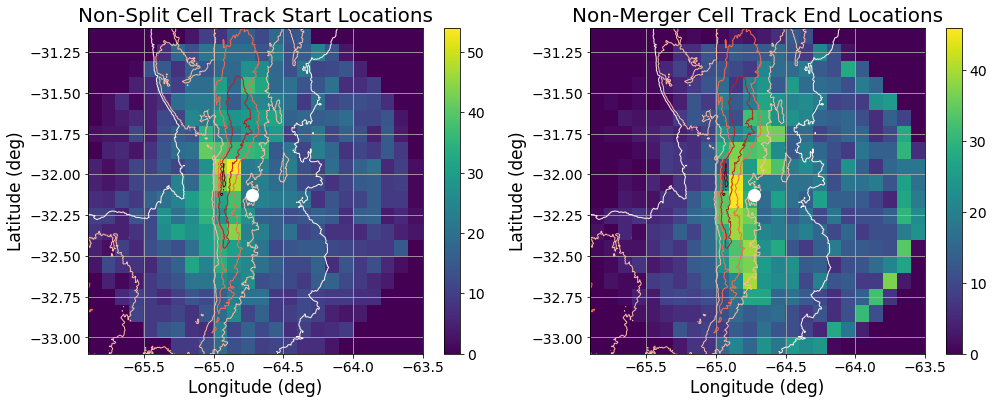

In [14]:
#Non-Split Start Locations and Non-Merger End Locations
nonmerge = np.where(np.nan_to_num(end_merge_tracknumber) == 0)[0]
nonsplit = np.where(np.nan_to_num(start_split_tracknumber) == 0)[0]

fig = plt.figure(figsize=(16.5,6.))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Longitude (deg)', fontsize=17)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h = ax1.hist2d(start_lon[nonsplit], start_lat[nonsplit], bins=[24,20], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax1)
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.set_title('Non-Split Cell Track Start Locations', fontsize=20)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Longitude (deg)', fontsize=17)
ax2.set_ylabel('Latitude (deg)', fontsize=17)
h = ax2.hist2d(end_lon[nonmerge], end_lat[nonmerge], bins=[24,20], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax2)
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.set_title('Non-Merger Cell Track End Locations', fontsize=20)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
fig.savefig('celltrack_nonsplitstart_nonmergeend_loc_0.1.png')

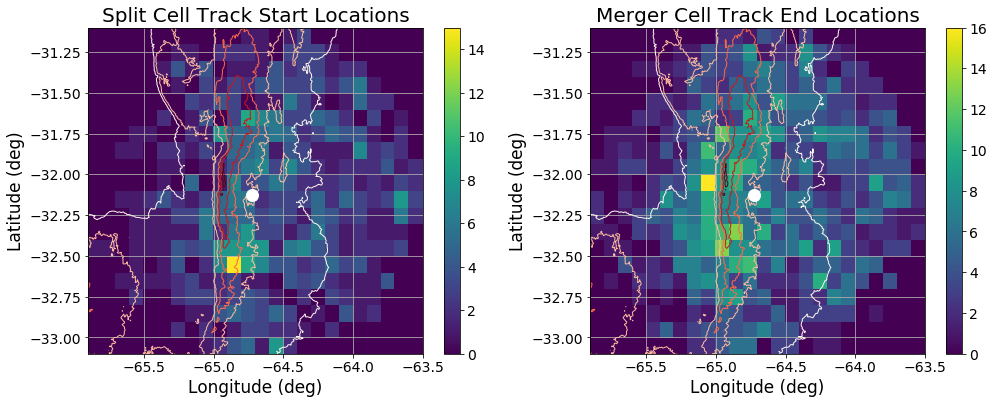

In [15]:
#merger locations, splits locations
merge = np.where(np.nan_to_num(end_merge_tracknumber) > 0)[0]
split = np.where(np.nan_to_num(start_split_tracknumber) > 0)[0]

fig = plt.figure(figsize=(16.5,6.))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Longitude (deg)', fontsize=17)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h = ax1.hist2d(start_lon[split], start_lat[split], bins=[24,20], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax1)
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.set_title('Split Cell Track Start Locations', fontsize=20)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Longitude (deg)', fontsize=17)
ax2.set_ylabel('Latitude (deg)', fontsize=17)
h = ax2.hist2d(end_lon[merge], end_lat[merge], bins=[24,20], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax2)
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.set_title('Merger Cell Track End Locations', fontsize=20)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
fig.savefig('celltrack_splitstart_mergeend_loc_0.1.png')

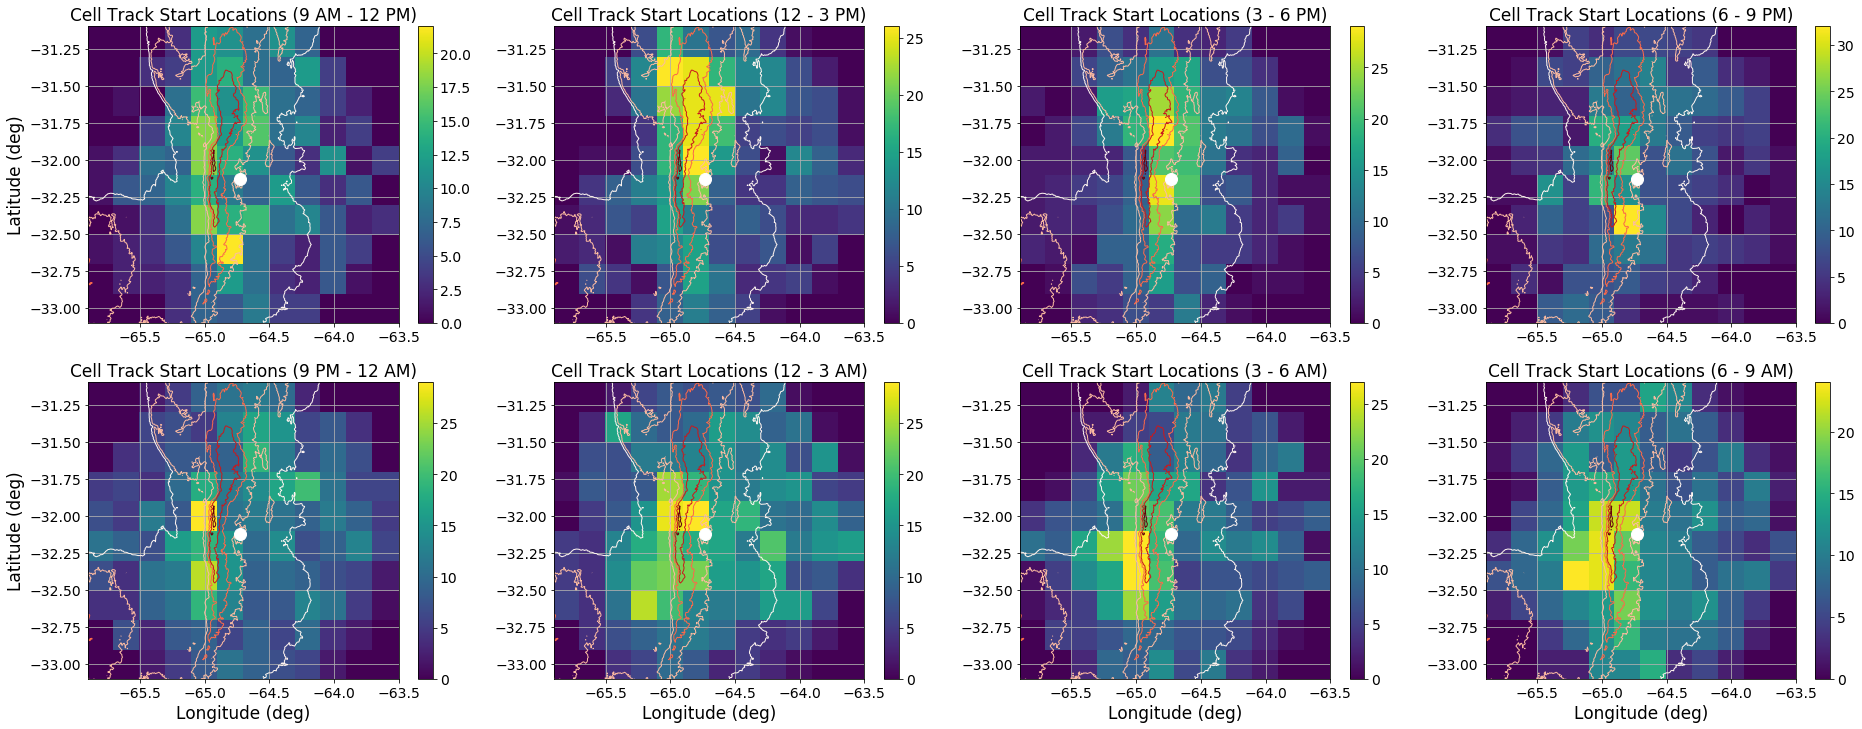

In [16]:
#filter by lifetime, max area, hour
mask0 = np.logical_and(start_hour >=0, start_hour < 3)
mask3 = np.logical_and(start_hour >= 3, start_hour < 6)
mask6 = np.logical_and(start_hour >= 6, start_hour < 9)
mask9 = np.logical_and(start_hour >= 9, start_hour < 12)
mask12 = np.logical_and(start_hour >= 12, start_hour < 15)
mask15 = np.logical_and(start_hour >= 15, start_hour < 18)
mask18 = np.logical_and(start_hour >= 18, start_hour < 21)
mask21 = np.logical_and(start_hour >= 21, start_hour < 24)

fig = plt.figure(figsize=(32.,12.))
ax1 = fig.add_subplot(2,4,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h = ax1.hist2d(start_lon[mask12], start_lat[mask12], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax1)
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.set_title('Cell Track Start Locations (9 AM - 12 PM)', fontsize=17)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,4,2)
h = ax2.hist2d(start_lon[mask15], start_lat[mask15], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax2)
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.set_title('Cell Track Start Locations (12 - 3 PM)', fontsize=17)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,4,3)
#ax3.set_ylabel('Latitude (deg)', fontsize=17)
h = ax3.hist2d(start_lon[mask18], start_lat[mask18], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax3)
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.set_title('Cell Track Start Locations (3 - 6 PM)', fontsize=17)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,4,4)
h = ax4.hist2d(start_lon[mask21], start_lat[mask21], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax4)
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.set_title('Cell Track Start Locations (6 - 9 PM)', fontsize=17)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
ax5 = fig.add_subplot(2,4,5)
ax5.set_ylabel('Latitude (deg)', fontsize=17)
ax5.set_xlabel('Longitude (deg)', fontsize=17)
h = ax5.hist2d(start_lon[mask0], start_lat[mask0], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax5)
ax5.set_xlim(-65.9, -63.5)
ax5.set_ylim(-33.1, -31.1)
ax5.set_title('Cell Track Start Locations (9 PM - 12 AM)', fontsize=17)
ax5.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax5.grid()
ax6 = fig.add_subplot(2,4,6)
ax6.set_xlabel('Longitude (deg)', fontsize=17)
h = ax6.hist2d(start_lon[mask3], start_lat[mask3], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax6)
ax6.set_xlim(-65.9, -63.5)
ax6.set_ylim(-33.1, -31.1)
ax6.set_title('Cell Track Start Locations (12 - 3 AM)', fontsize=17)
ax6.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax6.grid()
ax7 = fig.add_subplot(2,4,7)
ax7.set_xlabel('Longitude (deg)', fontsize=17)
#ax7.set_ylabel('Latitude (deg)', fontsize=17)
h = ax7.hist2d(start_lon[mask6], start_lat[mask6], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax7)
ax7.set_xlim(-65.9, -63.5)
ax7.set_ylim(-33.1, -31.1)
ax7.set_title('Cell Track Start Locations (3 - 6 AM)', fontsize=17)
ax7.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax7.grid()
ax8 = fig.add_subplot(2,4,8)
ax8.set_xlabel('Longitude (deg)', fontsize=17)
h = ax8.hist2d(start_lon[mask9], start_lat[mask9], bins=[12,10], range=[[-65.9,-63.5],[-33.1,-31.1]])
cb = plt.colorbar(h[3], ax=ax8)
ax8.set_xlim(-65.9, -63.5)
ax8.set_ylim(-33.1, -31.1)
ax8.set_title('Cell Track Start Locations (6 - 9 AM)', fontsize=17)
ax8.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax8.grid()
fig.savefig('celltrack_start_loc_diurnal_cycle_0.2_2x4.png')

In [17]:
#heatmaps (variable (e.g., cell area, lifetime) value in lon-lat bins)
lonbinsize = 0.2
latbinsize = 0.2
lon_nbin = 12
lat_nbin = 10

lonbins = np.arange(lon_nbin)*lonbinsize - 65.9
latbins = np.arange(lat_nbin)*latbinsize - 33.1
Mean_Area_heatmap = np.empty((lat_nbin, lon_nbin))
Mean_Area_heatmap[:] = np.nan
Median_Area_heatmap = np.empty((lat_nbin, lon_nbin))
Median_Area_heatmap[:] = np.nan
Max_Area_heatmap = np.empty((lat_nbin, lon_nbin))
Max_Area_heatmap[:] = np.nan
Mean_ETH10_heatmap = np.empty((lat_nbin, lon_nbin))
Mean_ETH10_heatmap[:] = np.nan
Median_ETH10_heatmap = np.empty((lat_nbin, lon_nbin))
Median_ETH10_heatmap[:] = np.nan
Max_ETH10_heatmap = np.empty((lat_nbin, lon_nbin))
Max_ETH10_heatmap[:] = np.nan
Mean_ETH20_heatmap = np.empty((lat_nbin, lon_nbin))
Mean_ETH20_heatmap[:] = np.nan
Median_ETH20_heatmap = np.empty((lat_nbin, lon_nbin))
Median_ETH20_heatmap[:] = np.nan
Max_ETH20_heatmap = np.empty((lat_nbin, lon_nbin))
Max_ETH20_heatmap[:] = np.nan
Mean_ETH30_heatmap = np.empty((lat_nbin, lon_nbin))
Mean_ETH30_heatmap[:] = np.nan
Median_ETH30_heatmap = np.empty((lat_nbin, lon_nbin))
Median_ETH30_heatmap[:] = np.nan
Max_ETH30_heatmap = np.empty((lat_nbin, lon_nbin))
Max_ETH30_heatmap[:] = np.nan
Mean_ETH40_heatmap = np.empty((lat_nbin, lon_nbin))
Mean_ETH40_heatmap[:] = np.nan
Median_ETH40_heatmap = np.empty((lat_nbin, lon_nbin))
Median_ETH40_heatmap[:] = np.nan
Max_ETH40_heatmap = np.empty((lat_nbin, lon_nbin))
Max_ETH40_heatmap[:] = np.nan
Mean_ETH50_heatmap = np.empty((lat_nbin, lon_nbin))
Mean_ETH50_heatmap[:] = np.nan
Median_ETH50_heatmap = np.empty((lat_nbin, lon_nbin))
Median_ETH50_heatmap[:] = np.nan
Max_ETH50_heatmap = np.empty((lat_nbin, lon_nbin))
Max_ETH50_heatmap[:] = np.nan
Samples_heatmap = np.empty((lat_nbin, lon_nbin))
Samples_heatmap[:] = np.nan

Lon_flat = np.array(cell_lon).flatten()
Lat_flat = np.array(cell_lat).flatten()
Area_flat = np.array(cell_area).flatten()
ETH10_flat = np.array(eth10).flatten()
ETH20_flat = np.array(eth20).flatten()
ETH30_flat = np.array(eth30).flatten()
ETH40_flat = np.array(eth40).flatten()
ETH50_flat = np.array(eth50).flatten()

for i in np.arange(lon_nbin):
    for j in np.arange(lat_nbin):
        mask = np.logical_and(np.logical_and(np.logical_and(np.logical_and(Lon_flat >= lonbins[i], Lon_flat < lonbins[i]+lonbinsize),
                              Lat_flat >= latbins[j]), Lat_flat < latbins[j]+latbinsize), Area_flat > 0)
        Samples_heatmap[j,i] = np.size(np.where(mask == True))
        if np.size(np.where(mask == True)) >= 10:
            Mean_Area_heatmap[j,i] = np.nanmean(Area_flat[mask])
            Median_Area_heatmap[j,i] = np.nanmedian(Area_flat[mask])
            Max_Area_heatmap[j,i] = np.nanmax(Area_flat[mask])
            Mean_ETH10_heatmap[j,i] = np.nanmean(ETH10_flat[mask])
            Median_ETH10_heatmap[j,i] = np.nanmedian(ETH10_flat[mask])
            Max_ETH10_heatmap[j,i] = np.nanmax(ETH10_flat[mask])
            Mean_ETH20_heatmap[j,i] = np.nanmean(ETH20_flat[mask])
            Median_ETH20_heatmap[j,i] = np.nanmedian(ETH20_flat[mask])
            Max_ETH20_heatmap[j,i] = np.nanmax(ETH20_flat[mask])
            Mean_ETH30_heatmap[j,i] = np.nanmean(ETH30_flat[mask])
            Median_ETH30_heatmap[j,i] = np.nanmedian(ETH30_flat[mask])
            Max_ETH30_heatmap[j,i] = np.nanmax(ETH30_flat[mask])
            Mean_ETH40_heatmap[j,i] = np.nanmean(ETH40_flat[mask])
            Median_ETH40_heatmap[j,i] = np.nanmedian(ETH40_flat[mask])
            Max_ETH40_heatmap[j,i] = np.nanmax(ETH40_flat[mask])
            Mean_ETH50_heatmap[j,i] = np.nanmean(ETH50_flat[mask])
            Median_ETH50_heatmap[j,i] = np.nanmedian(ETH50_flat[mask])
            Max_ETH50_heatmap[j,i] = np.nanmax(ETH50_flat[mask])

/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater_equal
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater_equal
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in less
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: Mean of empty slice
/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:80: Ru

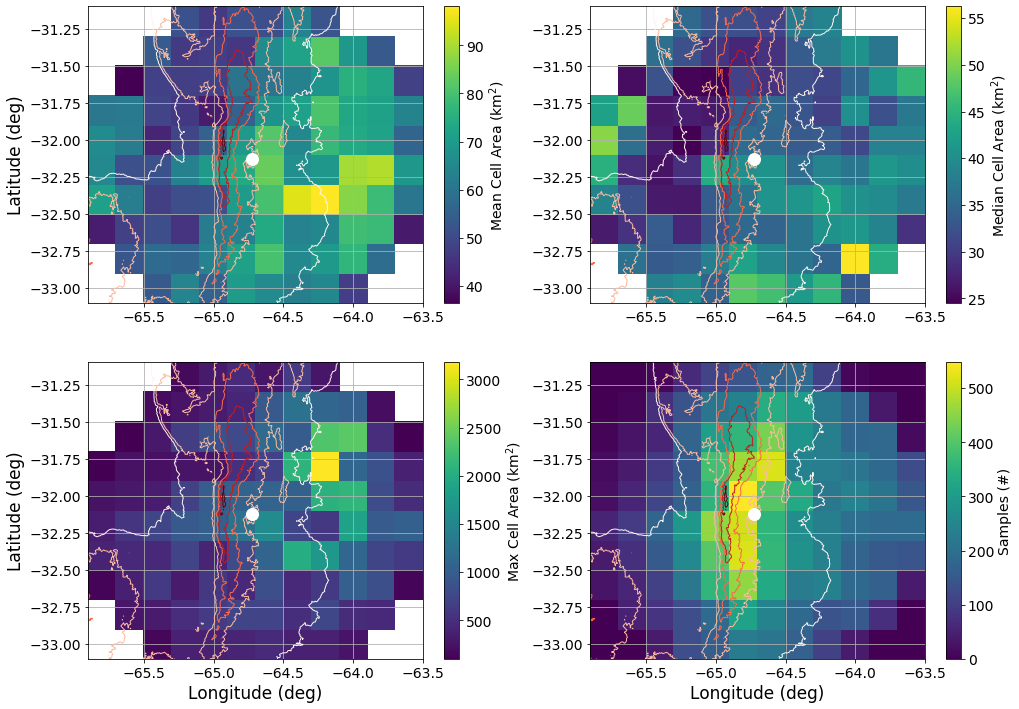

In [18]:
tmplon = np.arange(lon_nbin+1)*lonbinsize - 65.9
tmplat = np.arange(lat_nbin+1)*lonbinsize - 33.1

fig = plt.figure(figsize=(16.5,12.))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h1 = ax1.pcolormesh(tmplon, tmplat, Mean_Area_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb1 = plt.colorbar(h1, ax=ax1)
cb1.ax.set_ylabel('Mean Cell Area (km$^{2}$)')
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
h2 = ax2.pcolormesh(tmplon, tmplat, Median_Area_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb2 = plt.colorbar(h2, ax=ax2)
cb2.ax.set_ylabel('Median Cell Area (km$^{2}$)')
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Longitude (deg)', fontsize=17)
ax3.set_ylabel('Latitude (deg)', fontsize=17)
h3 = ax3.pcolormesh(tmplon, tmplat, Max_Area_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb3 = plt.colorbar(h3, ax=ax3)
cb3.ax.set_ylabel('Max Cell Area (km$^{2}$)')
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Longitude (deg)', fontsize=17)
h4 = ax4.pcolormesh(tmplon, tmplat, Samples_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb4 = plt.colorbar(h4, ax=ax4)
cb4.ax.set_ylabel('Samples (#)')
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
fig.savefig('mean_median_max_cell_area_loc_0.2.png')

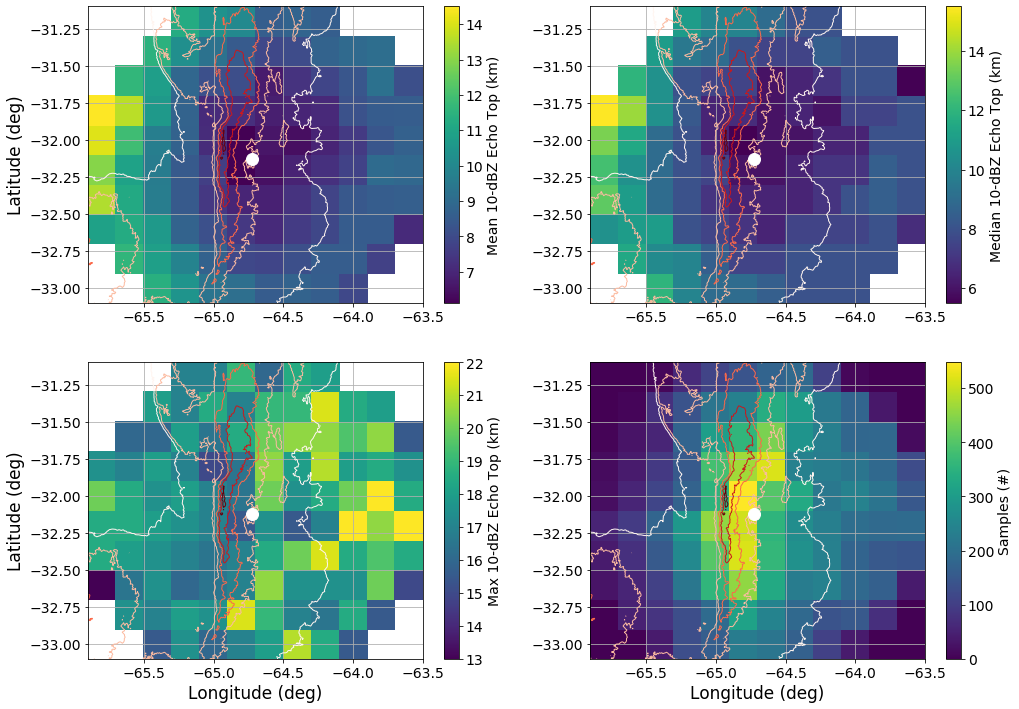

In [19]:
tmplon = np.arange(lon_nbin+1)*lonbinsize - 65.9
tmplat = np.arange(lat_nbin+1)*lonbinsize - 33.1

fig = plt.figure(figsize=(16.5,12.))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h1 = ax1.pcolormesh(tmplon, tmplat, Mean_ETH10_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb1 = plt.colorbar(h1, ax=ax1)
cb1.ax.set_ylabel('Mean 10-dBZ Echo Top (km)')
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
h2 = ax2.pcolormesh(tmplon, tmplat, Median_ETH10_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb2 = plt.colorbar(h2, ax=ax2)
cb2.ax.set_ylabel('Median 10-dBZ Echo Top (km)')
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Longitude (deg)', fontsize=17)
ax3.set_ylabel('Latitude (deg)', fontsize=17)
h3 = ax3.pcolormesh(tmplon, tmplat, Max_ETH10_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb3 = plt.colorbar(h3, ax=ax3)
cb3.ax.set_ylabel('Max 10-dBZ Echo Top (km)')
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Longitude (deg)', fontsize=17)
h4 = ax4.pcolormesh(tmplon, tmplat, Samples_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb4 = plt.colorbar(h4, ax=ax4)
cb4.ax.set_ylabel('Samples (#)')
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
fig.savefig('mean_median_max_10dBZ_ETH_loc_0.2.png')

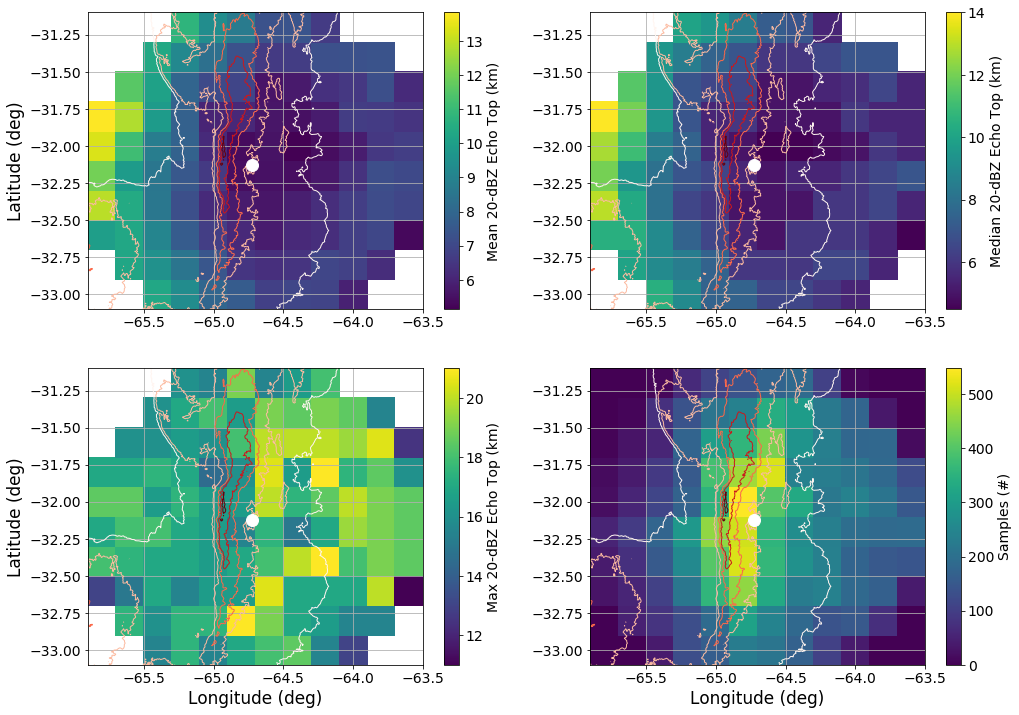

In [20]:
tmplon = np.arange(lon_nbin+1)*lonbinsize - 65.9
tmplat = np.arange(lat_nbin+1)*lonbinsize - 33.1

fig = plt.figure(figsize=(16.5,12.))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h1 = ax1.pcolormesh(tmplon, tmplat, Mean_ETH20_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb1 = plt.colorbar(h1, ax=ax1)
cb1.ax.set_ylabel('Mean 20-dBZ Echo Top (km)')
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
h2 = ax2.pcolormesh(tmplon, tmplat, Median_ETH20_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb2 = plt.colorbar(h2, ax=ax2)
cb2.ax.set_ylabel('Median 20-dBZ Echo Top (km)')
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Longitude (deg)', fontsize=17)
ax3.set_ylabel('Latitude (deg)', fontsize=17)
h3 = ax3.pcolormesh(tmplon, tmplat, Max_ETH20_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb3 = plt.colorbar(h3, ax=ax3)
cb3.ax.set_ylabel('Max 20-dBZ Echo Top (km)')
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Longitude (deg)', fontsize=17)
h4 = ax4.pcolormesh(tmplon, tmplat, Samples_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb4 = plt.colorbar(h4, ax=ax4)
cb4.ax.set_ylabel('Samples (#)')
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
fig.savefig('mean_median_max_20dBZ_ETH_loc_0.2.png')

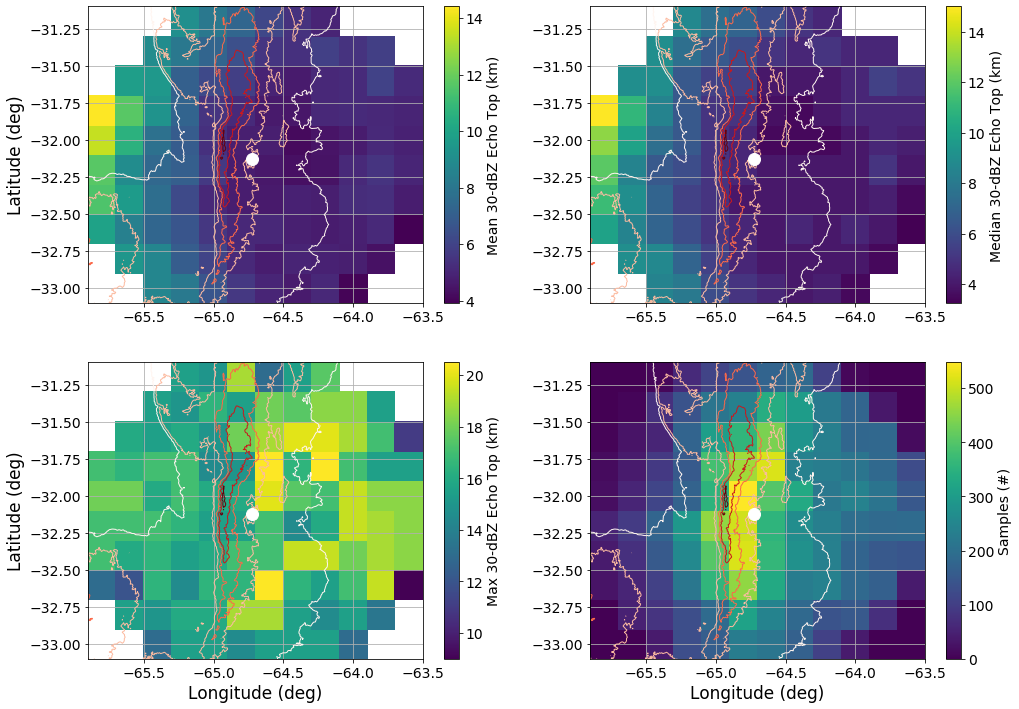

In [21]:
tmplon = np.arange(lon_nbin+1)*lonbinsize - 65.9
tmplat = np.arange(lat_nbin+1)*lonbinsize - 33.1

fig = plt.figure(figsize=(16.5,12.))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h1 = ax1.pcolormesh(tmplon, tmplat, Mean_ETH30_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb1 = plt.colorbar(h1, ax=ax1)
cb1.ax.set_ylabel('Mean 30-dBZ Echo Top (km)')
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
h2 = ax2.pcolormesh(tmplon, tmplat, Median_ETH30_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb2 = plt.colorbar(h2, ax=ax2)
cb2.ax.set_ylabel('Median 30-dBZ Echo Top (km)')
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Longitude (deg)', fontsize=17)
ax3.set_ylabel('Latitude (deg)', fontsize=17)
h3 = ax3.pcolormesh(tmplon, tmplat, Max_ETH30_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb3 = plt.colorbar(h3, ax=ax3)
cb3.ax.set_ylabel('Max 30-dBZ Echo Top (km)')
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Longitude (deg)', fontsize=17)
h4 = ax4.pcolormesh(tmplon, tmplat, Samples_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb4 = plt.colorbar(h4, ax=ax4)
cb4.ax.set_ylabel('Samples (#)')
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
fig.savefig('mean_median_max_30dBZ_ETH_loc_0.2.png')

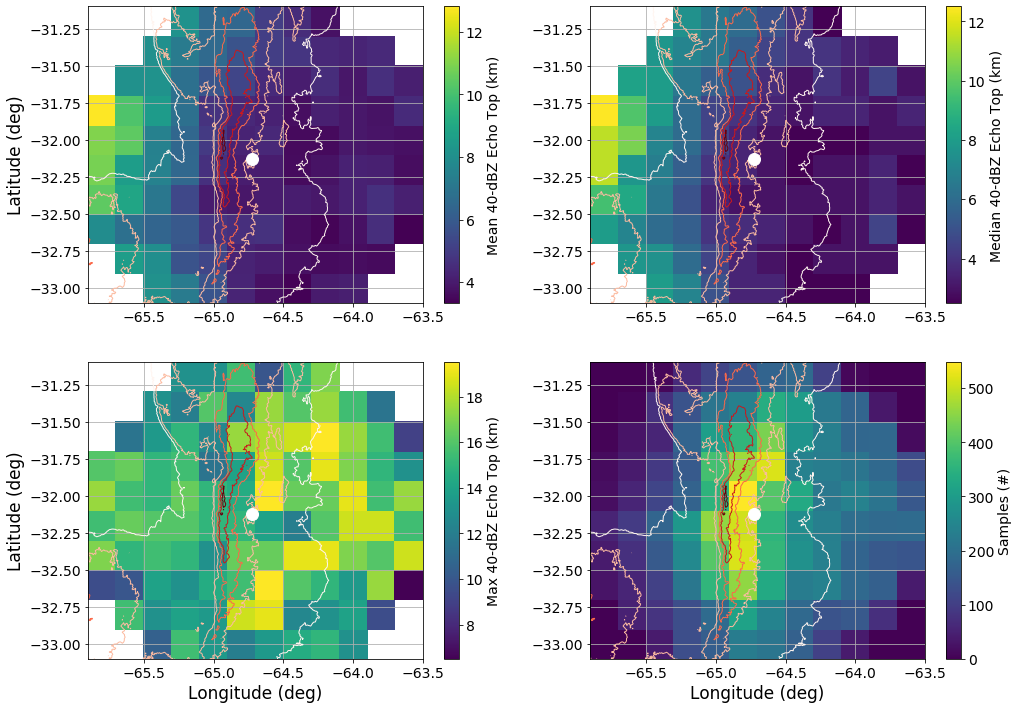

In [22]:
tmplon = np.arange(lon_nbin+1)*lonbinsize - 65.9
tmplat = np.arange(lat_nbin+1)*lonbinsize - 33.1

fig = plt.figure(figsize=(16.5,12.))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h1 = ax1.pcolormesh(tmplon, tmplat, Mean_ETH40_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb1 = plt.colorbar(h1, ax=ax1)
cb1.ax.set_ylabel('Mean 40-dBZ Echo Top (km)')
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
h2 = ax2.pcolormesh(tmplon, tmplat, Median_ETH40_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb2 = plt.colorbar(h2, ax=ax2)
cb2.ax.set_ylabel('Median 40-dBZ Echo Top (km)')
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Longitude (deg)', fontsize=17)
ax3.set_ylabel('Latitude (deg)', fontsize=17)
h3 = ax3.pcolormesh(tmplon, tmplat, Max_ETH40_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb3 = plt.colorbar(h3, ax=ax3)
cb3.ax.set_ylabel('Max 40-dBZ Echo Top (km)')
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Longitude (deg)', fontsize=17)
h4 = ax4.pcolormesh(tmplon, tmplat, Samples_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb4 = plt.colorbar(h4, ax=ax4)
cb4.ax.set_ylabel('Samples (#)')
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
fig.savefig('mean_median_max_40dBZ_ETH_loc_0.2.png')

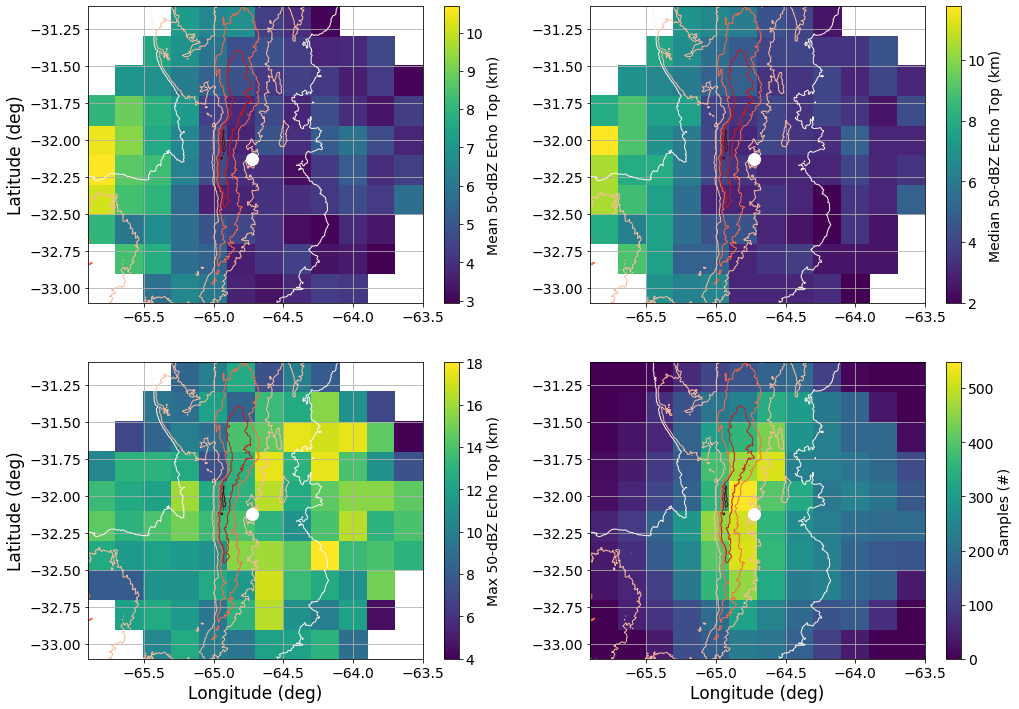

In [23]:
tmplon = np.arange(lon_nbin+1)*lonbinsize - 65.9
tmplat = np.arange(lat_nbin+1)*lonbinsize - 33.1

fig = plt.figure(figsize=(16.5,12.))
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('Latitude (deg)', fontsize=17)
h1 = ax1.pcolormesh(tmplon, tmplat, Mean_ETH50_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb1 = plt.colorbar(h1, ax=ax1)
cb1.ax.set_ylabel('Mean 50-dBZ Echo Top (km)')
ax1.set_xlim(-65.9, -63.5)
ax1.set_ylim(-33.1, -31.1)
ax1.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
h2 = ax2.pcolormesh(tmplon, tmplat, Median_ETH50_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb2 = plt.colorbar(h2, ax=ax2)
cb2.ax.set_ylabel('Median 50-dBZ Echo Top (km)')
ax2.set_xlim(-65.9, -63.5)
ax2.set_ylim(-33.1, -31.1)
ax2.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax2.grid()
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Longitude (deg)', fontsize=17)
ax3.set_ylabel('Latitude (deg)', fontsize=17)
h3 = ax3.pcolormesh(tmplon, tmplat, Max_ETH50_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb3 = plt.colorbar(h3, ax=ax3)
cb3.ax.set_ylabel('Max 50-dBZ Echo Top (km)')
ax3.set_xlim(-65.9, -63.5)
ax3.set_ylim(-33.1, -31.1)
ax3.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax3.grid()
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Longitude (deg)', fontsize=17)
h4 = ax4.pcolormesh(tmplon, tmplat, Samples_heatmap)#, range=[[-65.9,-63.5],[-33.1,-31.1]])
cb4 = plt.colorbar(h4, ax=ax4)
cb4.ax.set_ylabel('Samples (#)')
ax4.set_xlim(-65.9, -63.5)
ax4.set_ylim(-33.1, -31.1)
ax4.contour(topoLon, topoLat, topoZ, levels=[500,1000,1500,2000,2500], cmap='Reds', linewidths=1)
sym = plt.plot(-64.7284, -32.1264, color='white', marker='o', markersize=12)
ax4.grid()
fig.savefig('mean_median_max_50dBZ_ETH_loc_0.2.png')